In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_excel("D:\My-Projects\\Fake Review Detection\\Datasets\\review-details.xlsx")

In [4]:
df.head()

,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,...,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,2019-01-02,FRESHAMAZON,8718114216478,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,2019-01-01,5,...,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,5,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,4,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,2019-01-03,FRESHAMAZON,8712566479726,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,2019-01-02,5,...,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,2019-01-03,FRESHAMAZON,8717163536476,B014G37I7E,Cif,Homecare,HHC,Cif Citrus Bathroom Mousse 500ml,2019-01-02,5,...,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae


In [6]:
df.shape

(2501, 32)

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

SHAPE OF DATA AND ITS ATTRIBUTES

In [8]:
n_reviews ,n_attributes = df.shape
print('Total Reviews:',n_reviews)
print('Total Attributes',n_attributes)

Total Reviews: 2501
Total Attributes 32


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   report_date             2501 non-null   datetime64[ns]
 1   online_store            2501 non-null   object        
 2   upc                     2501 non-null   int64         
 3   retailer_product_code   2501 non-null   object        
 4   brand                   2501 non-null   object        
 5   category                2501 non-null   object        
 6   sub_category            2501 non-null   object        
 7   product_description     2501 non-null   object        
 8   review_date             2501 non-null   datetime64[ns]
 9   review_rating           2501 non-null   int64         
 10  review_title            2396 non-null   object        
 11  review_text             2501 non-null   object        
 12  is_competitor           2501 non-null   int64   

In [10]:
df.describe()

,report_date,upc,review_date,review_rating,is_competitor,matched_keywords,time_of_publication,manufacturers_response,dimension4,dimension5,dimension6,helpful_review_count
count,2501,2.501000e+03,2501,2501.000000,2501.0,0.0,0.0,0.0,0.0,0.0,0.0,2501.000000
mean,2019-03-29 10:45:26.269492224,7.632299e+12,2019-03-03 22:39:58.080767744,4.456218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.231507
min,2019-01-02 00:00:00,4.218266e+07,2019-01-01 00:00:00,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2019-02-26 00:00:00,8.710447e+12,2019-01-30 00:00:00,4.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,2019-03-22 00:00:00,8.710448e+12,2019-02-20 00:00:00,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,2019-05-07 00:00:00,8.712562e+12,2019-04-08 00:00:00,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
max,2019-05-27 00:00:00,8.722701e+12,2019-05-24 00:00:00,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
std,NaN,2.108171e+12,NaN,1.108595,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.953930


In [11]:
df.describe(include=object)

,online_store,retailer_product_code,brand,category,sub_category,product_description,review_title,review_text,manufacturer,market,url,review_type,parent_review,dimension1,dimension2,dimension3,dimension7,dimension8,review_hash_id
count,2501,2501,2501,2501,2501,2501,2396,2501,2501,2501,1654,2501,2501,2501,2501,2310,2499,2501,2501
unique,9,367,35,4,16,219,1243,1622,1,1,1571,2,2,16,106,94,15,1,2501
top,AMAZON,B077YLQ2R1,Comfort,Personal Care,Laundry,Simple x Little Mix Micellar Cleansing Wipes 2...,Great value,Good,Unilever Global,UK,https://www.sainsburys.co.uk/shop/gb/groceries...,Organic,Parent,Laundry,COTC Fabric Conditioner,COTC Fabric Conditioner,Retailer Core of the Core,Core of the Core,3f129b02-ea76-0323-bd59-235d97a4f83f
freq,1102,97,480,1182,993,108,48,25,2501,2501,52,1936,1800,993,326,276,1281,2501,1


In [12]:
df["review_type"].value_counts(normalize=True).to_frame()

,proportion
review_type,
Organic,0.77409
Syndicated,0.22591


In [13]:
df["parent_review"].value_counts(normalize=True).to_frame()

,proportion
parent_review,
Parent,0.719712
Child,0.280288


In [14]:
df["review_date"].value_counts().to_frame()

,count
review_date,
2019-02-19,70
2019-01-26,49
2019-02-01,47
2019-02-20,46
2019-05-01,40
2019-02-26,39
2019-01-31,38
2019-02-18,36
2019-01-14,36


In [15]:
df["report_date"].value_counts().to_frame()

,count
report_date,
2019-05-26,217
2019-02-28,201
2019-05-27,134
2019-03-25,122
2019-03-21,81
2019-02-22,56
2019-05-23,55
2019-03-22,50
2019-02-08,39


In [16]:
df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True)

category       sub_category                 
Foods          Dressings                         36
               Ice Cream                         39
               Other Foods                       16
               Savoury                          100
Homecare       HHC                               27
               Household Care                    30
               Laundry                          993
Personal Care  Deodorants & Fragrances          125
               Deos                             100
               Hair                             108
               Hair Care                         77
               Personal Care                     22
               Skin Care                        476
               Skin Cleansing                   274
Refreshment    Ice Cream                         70
               Tea                                3
               Tea and Soy & Fruit Beverages      5
Name: count, dtype: int64

In [17]:
df.loc[df.sub_category == "Ice Cream","category"] = "Refreshment"

In [18]:
df.loc[df.sub_category == "HHC","sub_category"] ="Household"

In [19]:
df.loc[df.sub_category == "Deos", "sub_category"] = "Deodorants & Fragrances"

In [20]:
df.loc[df.sub_category == "Tea", "sub_category"] = "Tea and Soy & Fruit Beverages"

In [21]:
df.loc[df.sub_category == "Hair Care", "sub_category"] = "Hair"

In [24]:
df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True)

category       sub_category                 
Foods          Dressings                         36
               Other Foods                       16
               Savoury                          100
Homecare       Household                         27
               Household Care                    30
               Laundry                          993
Personal Care  Deodorants & Fragrances          225
               Hair                             185
               Personal Care                     22
               Skin Care                        476
               Skin Cleansing                   274
Refreshment    Ice Cream                        109
               Tea and Soy & Fruit Beverages      8
Name: count, dtype: int64

In [25]:
df["online_store"].value_counts().to_frame()

,count
online_store,
AMAZON,1102
AMAZONPRIMEPANTRY,389
BOOTS,378
SUPERDRUG,188
OCADO,168
SAINSBURYS,123
ASDA,109
FRESHAMAZON,40
MORRISONS,4


In [26]:
df.isnull().sum()

report_date                  0
online_store                 0
upc                          0
retailer_product_code        0
brand                        0
category                     0
sub_category                 0
product_description          0
review_date                  0
review_rating                0
review_title               105
review_text                  0
is_competitor                0
manufacturer                 0
market                       0
matched_keywords          2501
time_of_publication       2501
url                        847
review_type                  0
parent_review                0
manufacturers_response    2501
dimension1                   0
dimension2                   0
dimension3                 191
dimension4                2501
dimension5                2501
dimension6                2501
dimension7                   2
dimension8                   0
verified_purchase            0
helpful_review_count         0
review_hash_id               0
dtype: i

In [28]:
duplicate = df.duplicated().sum()
print("Number of duplicates in dataset:",duplicate)

Number of duplicates in dataset: 0


In [29]:
cols = ['review_date','review_title', 'review_text','review_rating','verified_purchase']
textual_attributes = df[cols]
pd.DataFrame(textual_attributes).head()

,review_date,review_title,review_text,review_rating,verified_purchase
0,2019-01-01,Dove Men’s + Deodorant,"As you get older, you know what you like and w...",5,True
1,2019-01-02,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,5,True
2,2019-01-02,Vitamin B12.,Excellent,4,True
3,2019-01-02,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,5,True
4,2019-01-02,Very handy,Does what is says it does,5,False


In [31]:
cols=['dimension1','dimension2','dimension3','dimension4','dimension5','dimension6','dimension7','dimension8']
dimensions = df[cols]
pd.DataFrame(dimensions).head()

,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8
0,Deos,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core
1,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core
2,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core
3,Savoury,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core
4,HHC,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core


EXPLORATORY DATA ANALYSIS

In [32]:
sns.set_style('darkgrid')

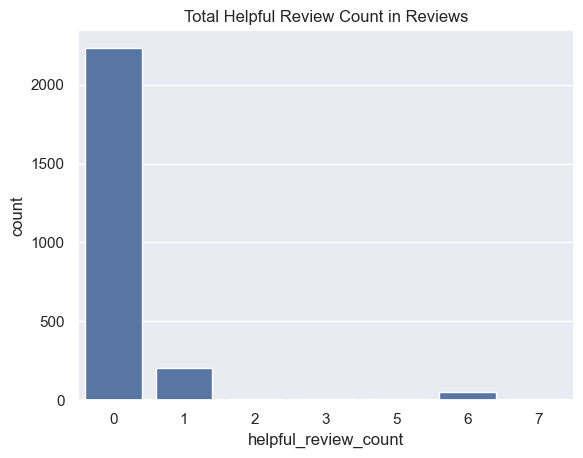

In [34]:
sns.countplot(x='helpful_review_count',
              data =df).set_title("Total Helpful Review Count in Reviews")
plt.show()

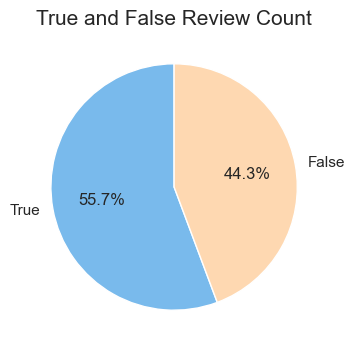

In [35]:
colors = ["#79BAEC","#FED8B1"]
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors=colors,labels=label.index, autopct='%1.1f%%',startangle=90)
plt.title('True and False Review Count',fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Review Rating grouped by verified purchase')

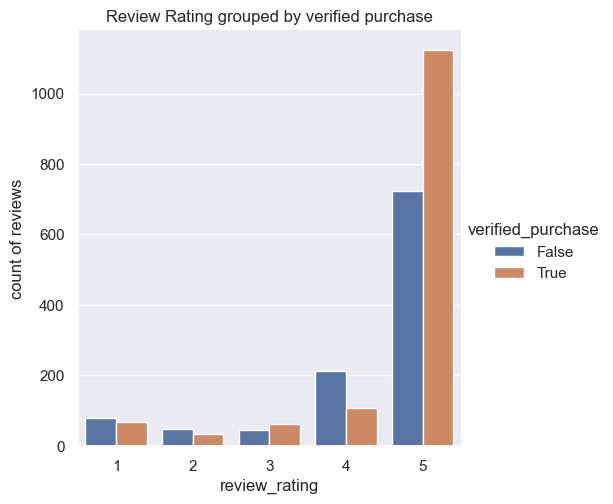

In [36]:
sns.catplot(x="review_rating",kind="count",hue="verified_purchase",data=df)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review Rating grouped by verified purchase")

Text(0.5, 1.0, 'Count of Product Sub Categories')

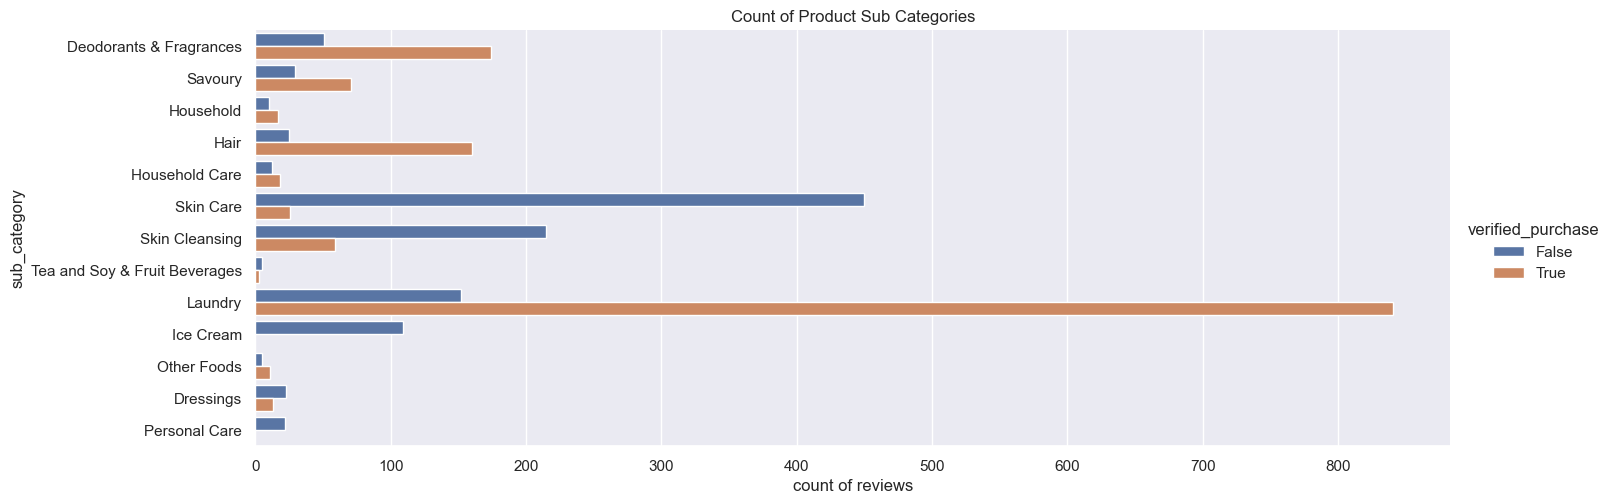

In [37]:
sns.catplot(y='sub_category',kind="count",hue="verified_purchase",data=df,  height=5, aspect=3)
plt.xlabel("count of reviews")
plt.ylabel("sub_category")
plt.title("Count of Product Sub Categories")

REVIEW TEXT EDA

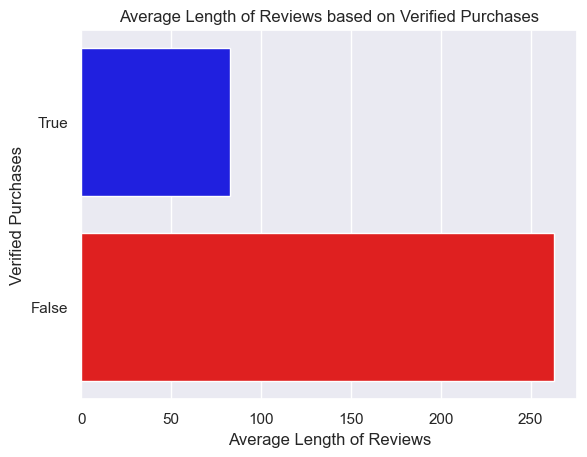

In [42]:

# Filter the DataFrame based on verified purchase status
cols = ["verified_purchase", "review_text"]
vprt = df[cols]

checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]

# Calculate the average length of reviews for true and false verified purchases
false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

# Data for plotting
x = [true_average_length, false_average_length]
y = ["True", "False"]

custom_palette = ["blue", "red"]

# Plotting
sns.barplot(x=x, y=y,palette=custom_palette)
plt.xlabel("Average Length of Reviews")
plt.ylabel("Verified Purchases")
plt.title("Average Length of Reviews based on Verified Purchases")
plt.show()


In [43]:
#DROP AFOREMENTIONED COLUMNS
df.drop(['matched_keywords', 'time_of_publication'
         ,'manufacturers_response', 'dimension4',
         'dimension5', 'dimension6', 
         'is_competitor', 'helpful_review_count',
        'report_date','online_store','brand',
         'category','sub_category', 'market',
        'upc', 'retailer_product_code', 'review_hash_id', 
         'url','product_description', 'parent_review', 
         'review_type', 'manufacturer', 'dimension1', 
         'dimension2','dimension3','dimension4',
         'dimension5', 'dimension7', 
         'dimension8'], axis=1, inplace=True)
df.head() #UPDATED DATAFRAME

,review_date,review_rating,review_title,review_text,verified_purchase
0,2019-01-01,5,Dove Men’s + Deodorant,"As you get older, you know what you like and w...",True
1,2019-01-02,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,2019-01-02,4,Vitamin B12.,Excellent,True
3,2019-01-02,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,2019-01-02,5,Very handy,Does what is says it does,False


In [44]:
df.to_csv('Datasets/updated_data.csv')